In [1]:
# 導入所需使用到的套件

# 導入 Python 進行資料處理之套件 Pandas，並把它另為 pd 
import pandas as pd
# 導入 Python 處理數值之套件 mumpy，並把它另為 np
import numpy as np
# 繪圖
import matplotlib.pyplot as plt
# 導入 Python 處理時間套件
import time

from scipy.stats import uniform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

In [2]:
df = pd.read_csv('dftrain0420.csv')
df = df.drop(['Unnamed: 0','土地位置建物門牌','交易年月日','建築完成年月',
             'new_date','address','longitude','latitude'],axis=1)

In [3]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66479 entries, 0 to 66478
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           66479 non-null  int64  
 1   土地移轉總坪數        66479 non-null  float64
 2   都市土地使用分區       66479 non-null  int64  
 3   移轉層次           66479 non-null  int64  
 4   總樓層數           66479 non-null  int64  
 5   建物型態           66479 non-null  int64  
 6   主要建材           66479 non-null  int64  
 7   建物移轉總坪數        66479 non-null  float64
 8   建物現況格局-房       66479 non-null  int64  
 9   建物現況格局-廳       66479 non-null  int64  
 10  建物現況格局-衛       66479 non-null  int64  
 11  建物現況格局-隔間      66479 non-null  int64  
 12  有無管理組織         66479 non-null  int64  
 13  總價元            66479 non-null  float64
 14  主建物坪數          66479 non-null  float64
 15  附屬建物坪數         66479 non-null  float64
 16  陽台坪數           66479 non-null  float64
 17  土地數量           66479 non-null  int64  
 18  建物數量  

In [4]:
# 設定依變數與自變數，即設定權重與標籤

# 權重
x = df.drop(['總價元'],axis=1)

# 標籤
y = df['總價元']

In [5]:
# 先將 x, y 依照 80%、20% 的比例分割成 訓練集與測試集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 再將訓練集依照 75%、25% 的比例分割成 訓練集與驗證集 => 訓練集、驗證集、測試集比例為 60%、20%、20%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# 將 x_train、x_test、x_val 轉換成 numpy 格式
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [6]:
# 將 x_train、x_test、x_val 進行資料標準化
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [7]:
# 計算誤差之 Function，輸出 RMSE 與 R^2
def compute_errors(y,pred):
    
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    
    error_names = ['RMSE', 'R^2']
    errors = [rmse, r2]
    
    for name, error in zip(error_names, errors):
        print(f'{name} : {error:.6f}')

In [8]:
start = time.time()

train_model1 = DecisionTreeRegressor(random_state=42).fit(x_train, y_train)

end = time.time()
print(f'Execution time : {end - start :.3f} seconds')

Execution time : 1.587 seconds


In [9]:
# 預測測試集
train_pred1 = train_model1.predict(x_test)

# 預測驗證集
val_pred1 = train_model1.predict(x_val)

In [10]:
print('----------Experiment 1----------')
print('Training Error')
compute_errors(y_test, train_pred1)
print('--------------------------------')
print('Valid Error') 
compute_errors(y_val, val_pred1)

----------Experiment 1----------
Training Error
RMSE : 233.213284
R^2 : 0.724769
--------------------------------
Valid Error
RMSE : 227.681914
R^2 : 0.737605


In [11]:
feature_importances = train_model1.feature_importances_

In [12]:
f = {}
for feature, importance in zip(list(x), list(feature_importances)):
    f[feature] = importance

In [13]:
sorted_features = sorted(f.items(), key=lambda i: i[1])

for feature, importance in sorted_features:
    print(f'{feature} : {importance}')
    print('-------------------------------------------------')

建物現況格局-隔間 : 0.00023099167273072494
-------------------------------------------------
建物數量 : 0.0005701709065215072
-------------------------------------------------
有無管理組織 : 0.0012742575630391472
-------------------------------------------------
移轉層次 : 0.00147438301721926
-------------------------------------------------
主要建材 : 0.0020269960874437086
-------------------------------------------------
經濟成長率(%) : 0.003274882647726516
-------------------------------------------------
土地數量 : 0.003896653969314029
-------------------------------------------------
五大行庫平均房貸利率(%) : 0.003960818185485509
-------------------------------------------------
都市土地使用分區 : 0.004356972605257002
-------------------------------------------------
建物現況格局-廳 : 0.005356628350051286
-------------------------------------------------
建物現況格局-房 : 0.007074588688307493
-------------------------------------------------
建物現況格局-衛 : 0.007421077144869099
-------------------------------------------------
陽台坪數 : 0.007448054265382

In [14]:
# 第二次執行，直接執行這邊，上面可以 Command 掉
import matplotlib as mpl 
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

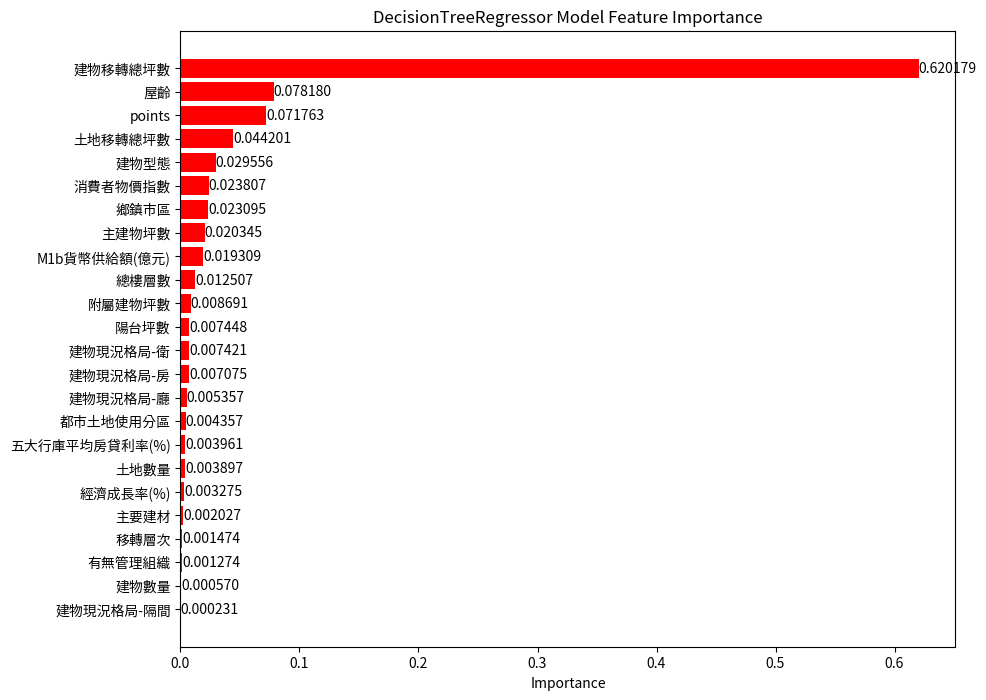

In [50]:
features, importances = zip(*sorted_features)

plt.figure(figsize=(10,8))
plt.barh(features, importances, color='red')
plt.xlabel('Importance')
plt.title('DecisionTreeRegressor Model Feature Importance')


for index, value in enumerate(importances):
    plt.text(value, index, f'{value:.6f}', va='center')
#plt.savefig('dtrfi')
plt.show()

In [16]:
median_fi = np.median(feature_importances)
x_train_new = x_train[:,feature_importances >= median_fi]
x_test_new = x_test[:,feature_importances >= median_fi]
x_val_new = x_val[:,feature_importances >= median_fi]

In [17]:
start = time.time()

train_model2 = DecisionTreeRegressor(random_state=42).fit(x_train_new, y_train)

end = time.time()

print(f'Execution time : {end - start :.3f} seconds')

Execution time : 1.350 seconds


In [18]:
# 預測測試集
train_pred2 = train_model2.predict(x_test_new)

# 預測驗證集
val_pred2 = train_model2.predict(x_val_new)

In [19]:
print('----------Experiment 2----------')
print('Training Error')
compute_errors(y_test, train_pred2)
print('--------------------------------')
print('Valid Error') 
compute_errors(y_val, val_pred2)

----------Experiment 2----------
Training Error
RMSE : 235.315390
R^2 : 0.719785
--------------------------------
Valid Error
RMSE : 233.451993
R^2 : 0.724137


In [21]:
start = time.time()

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'neg_mean_squared_error'

param_dict = {
    'criterion': ['squared_error','absolute_error','friedman_mse', 'poisson'],  
    'splitter': ['best', 'random'],               
    'max_depth': [None] + list(range(5,51,5)),                   
    'min_samples_split': list(range(2,42,4)),            
    'min_samples_leaf': list(range(1,41,4)),             
    'max_features': [None, 'sqrt', 'log2'] + list(range(1, 13))  
}

rscv = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_dict, n_iter=20, cv=cv, scoring=scoring, random_state=42)
rscv.fit(x_train_new, y_train)


print(f'The best model score : {np.sqrt(-rscv.best_score_):.6f}')
print('The best model param :', rscv.best_params_)

end = time.time()

print(f'Execution time : {end - start :.3f} seconds')

The best model score : 196.932024
The best model param : {'splitter': 'best', 'min_samples_split': 26, 'min_samples_leaf': 25, 'max_features': 12, 'max_depth': 50, 'criterion': 'poisson'}
Execution time : 1664.938 seconds


In [22]:
start = time.time()

param_dict = {
    'criterion': ['poisson'],  
    'splitter': ['best'],               
    'max_depth': [48,49,50],                   
    'min_samples_split': [25,26,27],            
    'min_samples_leaf': [24,25,26],             
    'max_features': [12] 
}

gscv = GridSearchCV(DecisionTreeRegressor(random_state=42), param_dict, cv=cv, scoring=scoring)
gscv.fit(x_train_new, y_train)


print(f'The best model score : {np.sqrt(-gscv.best_score_):.6f}')
print('The best model param :', gscv.best_params_)

end = time.time()

print(f'Execution time : {end - start :.3f} seconds')

The best model score : 196.932024
The best model param : {'criterion': 'poisson', 'max_depth': 48, 'max_features': 12, 'min_samples_leaf': 25, 'min_samples_split': 25, 'splitter': 'best'}
Execution time : 165.743 seconds


In [24]:
start = time.time()

train_model3 = DecisionTreeRegressor(criterion='poisson',
                                     splitter='best',
                                     max_depth=48,
                                     min_samples_leaf=25,
                                     min_samples_split=25,
                                     max_features=12,
                                     random_state=42,
                                    )
train_model3.fit(x_train_new, y_train)

end = time.time()

print(f'Execution time : {end - start :.3f} seconds')

Execution time : 0.631 seconds


In [25]:
# 預測測試集
train_pred3 = train_model3.predict(x_test_new)

# 預測驗證集
val_pred3 = train_model3.predict(x_val_new)

In [26]:
print('----------Experiment 3----------')
print('Training Error')
compute_errors(y_test, train_pred3)
print('--------------------------------')
print('Valid Error') 
compute_errors(y_val, val_pred3)
print('--------------------------------')

----------Experiment 3----------
Training Error
RMSE : 195.932020
R^2 : 0.805732
--------------------------------
Valid Error
RMSE : 193.454724
R^2 : 0.810566
--------------------------------


In [40]:
df112 = pd.read_csv('dfvalid0420.csv')
df112.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15916 entries, 0 to 15915
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     15916 non-null  int64  
 1   鄉鎮市區           15916 non-null  int64  
 2   土地位置建物門牌       15916 non-null  object 
 3   土地移轉總坪數        15916 non-null  float64
 4   都市土地使用分區       15916 non-null  int64  
 5   交易年月日          15916 non-null  object 
 6   移轉層次           15916 non-null  int64  
 7   總樓層數           15916 non-null  int64  
 8   建物型態           15916 non-null  int64  
 9   主要建材           15916 non-null  int64  
 10  建築完成年月         15916 non-null  object 
 11  建物移轉總坪數        15916 non-null  float64
 12  建物現況格局-房       15916 non-null  int64  
 13  建物現況格局-廳       15916 non-null  int64  
 14  建物現況格局-衛       15916 non-null  int64  
 15  建物現況格局-隔間      15916 non-null  int64  
 16  有無管理組織         15916 non-null  int64  
 17  總價元            15916 non-null  float64
 18  主建物坪數 

In [41]:
df112 = df112.drop(['Unnamed: 0','土地位置建物門牌','交易年月日','建築完成年月',
             'new_date','address','longitude','latitude'],axis=1)

In [42]:
new_data = df112.drop(['總價元'],axis=1)

In [43]:
selected_columns = new_data.columns[feature_importances >= median_fi]
new_data = new_data[selected_columns]

In [44]:
new_data = new_data.to_numpy()
scaler = StandardScaler().fit(new_data)
new_data = scaler.transform(new_data)

In [45]:
start = time.time()
new_data_pred = train_model3.predict(new_data)

print('Test new data')
print(compute_errors(df112['總價元'], new_data_pred))

end = time.time()

print(f'Execution time : {end - start :.3f} seconds')

Test new data
RMSE : 303.906527
R^2 : 0.636529
None
Execution time : 0.008 seconds
